# Support Vector Machine (SVM) Model with FFT Features Dataset

This notebook builds a Support Vector Machine (SVM) model using the FFT features dataset from the Raw_data directory. It includes:

1. Data loading and exploration
2. Data splitting (60% training, 20% validation, 20% test) with random shuffling
3. Feature selection interface
4. SVM model training with customizable parameters
5. Model evaluation and visualization
6. Cross-validation and hyperparameter tuning

## Import Required Libraries

Import the necessary libraries for data processing, modeling, and visualization.

In [1]:
# Data processing libraries
import pandas as pd
import numpy as np
import os

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Interactive widgets for feature selection
import ipywidgets as widgets
from IPython.display import display

# For saving the model
import joblib

# Set plotting styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")

## Load and Explore the Dataset

Load the FFT features dataset from the Raw_data directory and explore its structure.

In [2]:
# Define the path to the FFT features dataset
file_path = '/Users/vedantgupta/Documents/project /DEP-1/data/Raw_data/fft_features_dataset.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully with shape: {df.shape}")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    # Create a sample dataset for demonstration if the file is not found
    print("Creating sample data for demonstration...")
    np.random.seed(42)
    n_samples = 200
    window_ids = np.arange(n_samples)
    features = {f'feature_{i}': np.random.normal(0, 1, n_samples) + i * np.sin(window_ids/10) for i in range(1, 11)}
    features['window_id'] = window_ids
    # Add a label column for classification
    features['label'] = np.random.randint(0, 3, n_samples)
    df = pd.DataFrame(features)
    print(f"Sample dataset created with shape: {df.shape}")

Dataset loaded successfully with shape: (2792, 37)


First 5 rows of the dataset:


,fft_total_energy,fft_spectral_kurtosis,fft_spectral_skewness,fft_spectral_entropy,fft_peak_freq,fft_peak_amplitude,fft_bpfo_1x_energy,fft_bpfo_1x_peak,fft_bpfo_2x_energy,fft_bpfo_2x_peak,...,cur_bpfo_3x_peak,cur_bpfo_1x_upper_sideband,cur_bpfo_1x_lower_sideband,cur_bpfo_harmonic_ratio,cur_spectral_centroid,vib_cur_coherence,window_id,op_freq,BPFO,label
0,0.014995,342.624687,18.090283,4.694671,0.0,0.108815,7.228981e-07,0.000522,2.234853e-06,0.000879,...,0.130098,0.010411,0.056649,0.151708,987.250669,0.263249,0,20,55.478927,0
1,0.015267,342.272195,18.079856,4.654710,0.0,0.109795,1.037048e-06,0.000453,2.603617e-06,0.001005,...,0.129736,0.006357,0.036215,0.149443,928.036659,0.344890,1,20,55.478927,0
2,0.015125,342.920462,18.097394,4.723438,0.0,0.109293,1.068530e-06,0.000636,1.761568e-06,0.000613,...,0.116732,0.013051,0.066224,0.153472,1040.339770,0.297090,2,20,55.478927,0
3,0.014857,343.150759,18.105364,4.671007,0.0,0.108391,2.700607e-06,0.000783,1.570791e-06,0.000807,...,0.137694,0.018121,0.104149,0.188753,1021.711818,0.250239,3,20,55.478927,0
4,0.015114,342.541083,18.087168,4.629760,0.0,0.109290,9.345048e-07,0.000651,5.874055e-07,0.000519,...,0.120735,0.020045,0.120505,0.194232,1039.540433,0.232888,4,20,55.478927,0



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fft_total_energy            2792 non-null   float64
 1   fft_spectral_kurtosis       2792 non-null   float64
 2   fft_spectral_skewness       2792 non-null   float64
 3   fft_spectral_entropy        2792 non-null   float64
 4   fft_peak_freq               2792 non-null   float64
 5   fft_peak_amplitude          2792 non-null   float64
 6   fft_bpfo_1x_energy          2792 non-null   float64
 7   fft_bpfo_1x_peak            2792 non-null   float64
 8   fft_bpfo_2x_energy          2792 non-null   float64
 9   fft_bpfo_2x_peak            2792 non-null   float64
 10  fft_bpfo_3x_energy          2792 non-null   float64
 11  fft_bpfo_3x_peak            2792 non-null   float64
 12  fft_bpfo_1x_upper_sideband  2792 non-null   float64
 13  fft_bpfo_1x

None


Missing values in the dataset:


fft_total_energy              0
fft_spectral_kurtosis         0
fft_spectral_skewness         0
fft_spectral_entropy          0
fft_peak_freq                 0
fft_peak_amplitude            0
fft_bpfo_1x_energy            0
fft_bpfo_1x_peak              0
fft_bpfo_2x_energy            0
fft_bpfo_2x_peak              0
fft_bpfo_3x_energy            0
fft_bpfo_3x_peak              0
fft_bpfo_1x_upper_sideband    0
fft_bpfo_1x_lower_sideband    0
fft_bpfo_harmonic_ratio       0
fft_spectral_centroid         0
cur_total_energy              0
cur_spectral_kurtosis         0
cur_spectral_skewness         0
cur_spectral_entropy          0
cur_peak_freq                 0
cur_peak_amplitude            0
cur_bpfo_1x_energy            0
cur_bpfo_1x_peak              0
cur_bpfo_2x_energy            0
cur_bpfo_2x_peak              0
cur_bpfo_3x_energy            0
cur_bpfo_3x_peak              0
cur_bpfo_1x_upper_sideband    0
cur_bpfo_1x_lower_sideband    0
cur_bpfo_harmonic_ratio       0
cur_spec


Basic statistics:


,fft_total_energy,fft_spectral_kurtosis,fft_spectral_skewness,fft_spectral_entropy,fft_peak_freq,fft_peak_amplitude,fft_bpfo_1x_energy,fft_bpfo_1x_peak,fft_bpfo_2x_energy,fft_bpfo_2x_peak,...,cur_bpfo_3x_peak,cur_bpfo_1x_upper_sideband,cur_bpfo_1x_lower_sideband,cur_bpfo_harmonic_ratio,cur_spectral_centroid,vib_cur_coherence,window_id,op_freq,BPFO,label
count,2792.000000,2792.000000,2792.000000,2792.000000,2792.0,2792.000000,2.792000e+03,2792.000000,2.792000e+03,2792.000000,...,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.0000,2792.000000,2792.000000,2792.00000
mean,0.027710,339.939834,17.977223,4.958092,0.0,0.143229,1.266898e-05,0.001862,1.468516e-05,0.001886,...,0.145489,0.014683,0.297987,0.095571,946.278007,0.124409,1395.5000,27.500000,76.283525,0.50000
std,0.011633,3.063089,0.120740,0.286626,0.0,0.030543,1.453897e-05,0.001409,1.876124e-05,0.001482,...,0.198179,0.027505,0.210198,0.080226,105.087835,0.060938,806.1253,5.591171,15.509609,0.50009
min,0.013998,329.938081,17.637858,4.413572,0.0,0.105274,1.898596e-07,0.000228,1.308771e-07,0.000204,...,0.004878,0.000042,0.016652,0.000141,772.918722,0.016882,0.0000,20.000000,55.478927,0.00000
25%,0.016074,337.335230,17.869816,4.678023,0.0,0.112684,1.335768e-06,0.000657,1.545953e-06,0.000715,...,0.023167,0.000471,0.117375,0.028959,844.060068,0.071078,697.7500,23.750000,65.881226,0.00000
50%,0.027324,340.807936,18.021694,4.972106,0.0,0.144093,3.723791e-06,0.001172,4.153448e-06,0.001200,...,0.052068,0.001026,0.236918,0.062344,915.536189,0.111647,1395.5000,27.500000,76.283525,0.50000
75%,0.039316,342.682989,18.090438,5.240967,0.0,0.173676,2.117723e-05,0.002935,2.143827e-05,0.002709,...,0.175872,0.008553,0.481420,0.185259,1056.887578,0.174195,2093.2500,31.250000,86.685824,1.00000
max,0.042845,345.123374,18.153828,5.361321,0.0,0.181421,1.127561e-04,0.007264,1.042674e-04,0.007542,...,0.693436,0.220881,0.744812,0.250326,1121.710932,0.344890,2791.0000,35.000000,97.088123,1.00000



Label distribution:


label
0    1396
1    1396
Name: count, dtype: int64

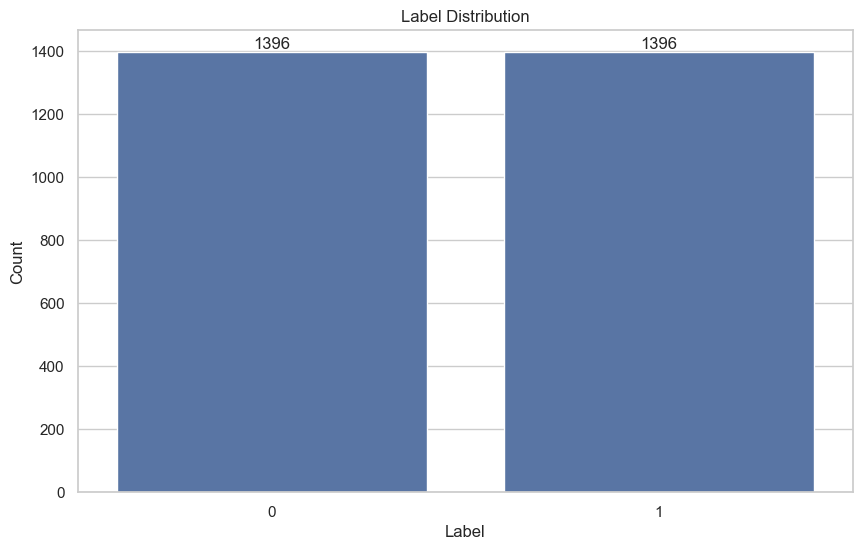

In [3]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# Display dataset information
print("\nDataset information:")
display(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
display(df.isnull().sum())

# Display basic statistics
print("\nBasic statistics:")
display(df.describe())

# Check for the label column
if 'label' in df.columns:
    print("\nLabel distribution:")
    display(df['label'].value_counts())
    
    # Visualize label distribution
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='label', data=df)
    for i in ax.containers:
        ax.bar_label(i)
    plt.title('Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()
else:
    print("\nWarning: No 'label' column found in the dataset. A label column is required for classification.")

## Prepare Data for Modeling

Split the data into features and target, and then into training (60%), validation (20%), and test (20%) sets.

In [4]:
def prepare_data(df):
    """Prepare the dataset for modeling by preprocessing and splitting it."""
    
    # Check if we have a label column for classification
    if 'label' not in df.columns:
        print("Error: No 'label' column found in the dataset. A label column is required for classification.")
        print("Please ensure your dataset contains a 'label' column or modify the code to use an appropriate column.")
        return None, None, None, None, None, None, None, None
    
    # Identify features and target
    X = df.drop(['label'], axis=1)
    
    # If window_id doesn't add predictive value, we can drop it
    if 'window_id' in X.columns:
        X = X.drop(['window_id'], axis=1)
    
    # Store original feature names for later
    feature_names = X.columns.tolist()
    
    # Get target variable
    y = df['label']
    
    # Convert target to numeric if it's categorical
    if y.dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(y)
        label_names = le.classes_
        print(f"Encoded labels: {dict(zip(range(len(label_names)), label_names))}")
    else:
        unique_labels = sorted(y.unique())
        label_names = [f"Class {i}" for i in unique_labels]
        print(f"Labels in dataset: {unique_labels}")
    
    # Split into train, validation, and test sets (60%, 20%, 20%)
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val  # 0.25 of 0.8 = 0.2 of total
    )
    
    # Scale the features (important for SVM)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert scaled arrays back to DataFrames to keep feature names
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
    X_val_scaled = pd.DataFrame(X_val_scaled, columns=feature_names, index=X_val.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)
    
    print(f"Data split complete:")
    print(f"  Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df):.1%})")
    print(f"  Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df):.1%})")
    print(f"  Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df):.1%})")
    print(f"  Feature dimensionality: {X_train.shape[1]}")
    
    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, feature_names, scaler

# Prepare the data
X_train, X_val, X_test, y_train, y_val, y_test, all_feature_names, scaler = prepare_data(df)

Labels in dataset: [np.int64(0), np.int64(1)]
Data split complete:
  Training set: 1674 samples (60.0%)
  Validation set: 559 samples (20.0%)
  Test set: 559 samples (20.0%)
  Feature dimensionality: 35


## Feature Selection Interface

Create an interactive interface to select which features to use for model training.

In [5]:
def create_feature_selector(feature_names):
    """Create interactive widgets for selecting features."""
    if feature_names is None:
        print("No feature names available. Cannot create feature selector.")
        return None, None
    
    # Create checkboxes for each feature
    feature_checkboxes = [widgets.Checkbox(value=True, description=f"{i+1}: {name}") 
                          for i, name in enumerate(feature_names)]
    
    # Create buttons for selecting/deselecting all features
    select_all_button = widgets.Button(description="Select All")
    deselect_all_button = widgets.Button(description="Deselect All")
    select_by_corr_button = widgets.Button(description="Select Top 5 by Correlation")
    
    # Define button callbacks
    def select_all(b):
        for checkbox in feature_checkboxes:
            checkbox.value = True
    
    def deselect_all(b):
        for checkbox in feature_checkboxes:
            checkbox.value = False
    
    def select_by_correlation(b):
        # First deselect all
        for checkbox in feature_checkboxes:
            checkbox.value = False
        
        # Try to get correlation values with label
        try:
            corr_values = df[feature_names].corrwith(df['label']).abs().sort_values(ascending=False)
            top_features = corr_values.head(5).index.tolist()
            
            # Select top 5 features by correlation with label
            for checkbox in feature_checkboxes:
                feature_name = checkbox.description.split(": ")[1]
                if feature_name in top_features:
                    checkbox.value = True
            
            print(f"Selected top 5 features by correlation with label: {', '.join(top_features)}")
        except Exception as e:
            print(f"Error selecting by correlation: {e}")
            # If there's an error, just select the first 5 features
            for i, checkbox in enumerate(feature_checkboxes):
                if i < 5:
                    checkbox.value = True
    
    # Attach callbacks to buttons
    select_all_button.on_click(select_all)
    deselect_all_button.on_click(deselect_all)
    select_by_corr_button.on_click(select_by_correlation)
    
    # Create layout for the feature selection UI
    button_box = widgets.HBox([select_all_button, deselect_all_button, select_by_corr_button])
    checkbox_box = widgets.VBox(feature_checkboxes)
    feature_selector = widgets.VBox([
        widgets.HTML(value="<h3>Select features to include in the model:</h3>"),
        button_box,
        checkbox_box
    ])
    
    return feature_selector, feature_checkboxes

# Create widgets for SVM parameters
kernel_widget = widgets.Dropdown(
    options=['linear', 'poly', 'rbf', 'sigmoid'],
    value='rbf',
    description='Kernel:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

C_widget = widgets.FloatLogSlider(
    value=1.0,
    base=10,
    min=-3,  # 10^-3 = 0.001
    max=3,   # 10^3 = 1000
    step=0.2,
    description='C (Regularization):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

gamma_widget = widgets.Dropdown(
    options=['scale', 'auto', 'value'],
    value='scale',
    description='Gamma:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

gamma_value_widget = widgets.FloatLogSlider(
    value=0.1,
    base=10,
    min=-5,  # 10^-5 = 0.00001
    max=0,   # 10^0 = 1
    step=0.2,
    description='Gamma value:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

# Create the feature selector if features are available
if all_feature_names:
    feature_selector, feature_checkboxes = create_feature_selector(all_feature_names)
    display(widgets.VBox([
        feature_selector,
        widgets.HTML(value="<h3>SVM Model Parameters:</h3>"),
        kernel_widget,
        C_widget,
        gamma_widget,
        gamma_value_widget
    ]))

## Train the SVM Model

Define a function to train the SVM model with the selected features and parameters.

In [ ]:
def train_model(feature_checkboxes, kernel, C, gamma, gamma_value):
    """Train an SVM model with the selected features and parameters."""
    if X_train is None or y_train is None:
        print("Error: Training data not available.")
        return None, None
    
    # Get selected features
    selected_features = []
    for checkbox in feature_checkboxes:
        if checkbox.value:
            # Extract the feature name from checkbox description (format: "index: name")
            feature_name = checkbox.description.split(": ")[1]
            selected_features.append(feature_name)
    
    if not selected_features:
        print("Error: No features selected. Please select at least one feature.")
        return None, None
    
    print(f"\nTraining SVM model with {len(selected_features)} selected features:")
    for i, feature in enumerate(selected_features):
        print(f"  {i+1}. {feature}")
    
    # Set gamma parameter
    if gamma == 'value':
        gamma_param = gamma_value
    else:
        gamma_param = gamma
    
    # Create the model with the specified parameters
    print(f"\nSVM Parameters:")
    print(f"  Kernel: {kernel}")
    print(f"  C (Regularization): {C}")
    print(f"  Gamma: {gamma_param}")
    
    model = SVC(
        kernel=kernel,
        C=C,
        gamma=gamma_param,
        random_state=42,
        probability=True  # Enable probability estimates for ROC curve, etc.
    )
    
    # Train the model with selected features
    model.fit(X_train[selected_features], y_train)
    
    # Evaluate on validation set
    val_preds = model.predict(X_val[selected_features])
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Evaluate on test set
    test_preds = model.predict(X_test[selected_features])
    test_accuracy = accuracy_score(y_test, test_preds)
    
    print(f"\nModel Training Complete:")
    print(f"  Validation Accuracy: {val_accuracy:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    
    # Show more detailed metrics for the validation set
    print("\nValidation Set Classification Report:")
    print(classification_report(y_val, val_preds))
    
    # Display confusion matrix for validation set
    print("\nValidation Set Confusion Matrix:")
    cm = confusion_matrix(y_val, val_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Validation Set)')
    plt.show()
    
    return model, selected_features

# Create a button to train the model
train_button = widgets.Button(
    description="Train SVM Model",
    button_style='success',
    layout=widgets.Layout(width='200px', height='40px')
)

# Define the callback for the train button
output = widgets.Output()

@output.capture()
def on_train_button_clicked(b):
    if 'feature_checkboxes' not in globals():
        print("Error: Feature checkboxes not initialized.")
        return
    
    # Get gamma parameter
    if gamma_widget.value == 'value':
        gamma_param = gamma_value_widget.value
    else:
        gamma_param = gamma_widget.value
    
    model, selected_features = train_model(
        feature_checkboxes,
        kernel_widget.value,
        C_widget.value,
        gamma_widget.value,
        gamma_value_widget.value
    )
    
    if model is not None:
        # Store the model and selected features as global variables for later use
        global svm_model, svm_selected_features
        svm_model = model
        svm_selected_features = selected_features

# Connect the callback to the button
train_button.on_click(on_train_button_clicked)

# Display the button and output area
display(train_button)
display(output)

Button(button_style='success', description='Train SVM Model', layout=Layout(height='40px', width='200px'), sty…

Output()

## Hyperparameter Tuning with Cross-Validation

Define a function to automatically find the best hyperparameters for the SVM model using grid search with cross-validation.

In [7]:
def tune_hyperparameters(feature_checkboxes):
    """Find the best hyperparameters for the SVM model using grid search with cross-validation."""
    if X_train is None or y_train is None:
        print("Error: Training data not available.")
        return None, None, None
    
    # Get selected features
    selected_features = []
    for checkbox in feature_checkboxes:
        if checkbox.value:
            feature_name = checkbox.description.split(": ")[1]
            selected_features.append(feature_name)
    
    if not selected_features:
        print("Error: No features selected. Please select at least one feature.")
        return None, None, None
    
    print(f"Performing hyperparameter tuning with {len(selected_features)} selected features...")
    
    # Define the parameter grid to search
    param_grid = {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]
    }
    
    # Create an SVM model
    svm = SVC(probability=True, random_state=42)
    
    # Perform grid search with 5-fold cross-validation
    grid_search = GridSearchCV(
        svm,
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1  # Use all available CPU cores
    )
    
    # Fit the grid search model
    grid_search.fit(X_train[selected_features], y_train)
    
    # Get the best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    
    print(f"\nHyperparameter Tuning Complete:")
    print(f"  Best Cross-Validation Score: {best_score:.4f}")
    print(f"  Best Parameters: {best_params}")
    
    # Evaluate on validation set
    val_preds = best_model.predict(X_val[selected_features])
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Evaluate on test set
    test_preds = best_model.predict(X_test[selected_features])
    test_accuracy = accuracy_score(y_test, test_preds)
    
    print(f"\nBest Model Performance:")
    print(f"  Validation Accuracy: {val_accuracy:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    
    # Show detailed metrics for the test set
    print("\nTest Set Classification Report:")
    print(classification_report(y_test, test_preds))
    
    # Display confusion matrix for test set
    print("\nTest Set Confusion Matrix:")
    cm = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Test Set)')
    plt.show()
    
    # Display results from grid search
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results = cv_results.sort_values('rank_test_score')
    top_results = cv_results[['param_kernel', 'param_C', 'param_gamma', 'mean_test_score']].head(10)
    print("\nTop 10 Hyperparameter Combinations:")
    display(top_results)
    
    # Visualize performance across different hyperparameters
    plt.figure(figsize=(15, 5))
    
    # Performance by kernel
    plt.subplot(1, 3, 1)
    sns.boxplot(x='param_kernel', y='mean_test_score', data=cv_results)
    plt.title('Performance by Kernel')
    plt.xlabel('Kernel')
    plt.ylabel('Cross-validation Score')
    
    # Performance by C
    plt.subplot(1, 3, 2)
    C_values = cv_results['param_C'].astype(str)
    sns.boxplot(x=C_values, y='mean_test_score', data=cv_results)
    plt.title('Performance by C')
    plt.xlabel('C')
    
    # Performance by gamma (excluding 'scale' and 'auto')
    plt.subplot(1, 3, 3)
    numeric_gamma = cv_results[cv_results['param_gamma'].apply(lambda x: isinstance(x, (int, float)))]
    if not numeric_gamma.empty:
        sns.boxplot(x=numeric_gamma['param_gamma'].astype(str), y=numeric_gamma['mean_test_score'])
        plt.title('Performance by Gamma (Numeric)')
        plt.xlabel('Gamma')
    else:
        plt.title('No numeric gamma values')
    
    plt.tight_layout()
    plt.show()
    
    return best_model, best_params, selected_features

# Create a button to perform hyperparameter tuning
tune_button = widgets.Button(
    description="Tune Hyperparameters",
    button_style='primary',
    layout=widgets.Layout(width='200px', height='40px')
)

# Define the callback for the tune button
tune_output = widgets.Output()

@tune_output.capture()
def on_tune_button_clicked(b):
    if 'feature_checkboxes' not in globals():
        print("Error: Feature checkboxes not initialized.")
        return
    
    best_model, best_params, selected_features = tune_hyperparameters(feature_checkboxes)
    
    if best_model is not None:
        # Store the best model and selected features as global variables for later use
        global svm_model, svm_selected_features, svm_best_params
        svm_model = best_model
        svm_selected_features = selected_features
        svm_best_params = best_params

# Connect the callback to the button
tune_button.on_click(on_tune_button_clicked)

# Display the button and output area
display(tune_button)
display(tune_output)

Button(button_style='primary', description='Tune Hyperparameters', layout=Layout(height='40px', width='200px')…

Output()

## Evaluate the Model on the Test Set

Evaluate the trained model on the test set and display detailed metrics.

In [8]:
def evaluate_on_test_set():
    """Evaluate the trained SVM model on the test set"""
    if 'svm_model' not in globals() or 'svm_selected_features' not in globals():
        print("Error: No trained model available. Please train a model first.")
        return
    
    # Get the trained model and selected features
    model = svm_model
    selected_features = svm_selected_features
    
    # Make predictions on the test set
    test_preds = model.predict(X_test[selected_features])
    test_accuracy = accuracy_score(y_test, test_preds)
    
    print(f"SVM Model Evaluation on Test Set:")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    
    # Detailed classification report
    print("\nTest Set Classification Report:")
    print(classification_report(y_test, test_preds))
    
    # Confusion matrix
    print("\nTest Set Confusion Matrix:")
    cm = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Test Set)')
    plt.show()
    
    # If the model allows, get decision function values for the test set
    if hasattr(model, 'decision_function'):
        try:
            # Get decision function values
            decision_values = model.decision_function(X_test[selected_features])
            
            # If binary classification, plot histogram of decision values
            if len(np.unique(y_test)) == 2:
                plt.figure(figsize=(10, 6))
                for label in np.unique(y_test):
                    mask = (y_test == label)
                    plt.hist(decision_values[mask], bins=20, alpha=0.7, label=f'Class {label}')
                plt.axvline(x=0, color='k', linestyle='--')
                plt.xlabel('Decision Function Value')
                plt.ylabel('Count')
                plt.title('SVM Decision Function Values')
                plt.legend()
                plt.grid(True)
                plt.show()
        except Exception as e:
            print(f"Could not plot decision function: {e}")

# Create a button to evaluate on the test set
eval_button = widgets.Button(
    description="Evaluate on Test Set",
    button_style='info',
    layout=widgets.Layout(width='200px', height='40px')
)

# Define the callback for the evaluation button
eval_output = widgets.Output()

@eval_output.capture()
def on_eval_button_clicked(b):
    evaluate_on_test_set()

# Connect the callback to the button
eval_button.on_click(on_eval_button_clicked)

# Display the button and output area
display(eval_button)
display(eval_output)

Button(button_style='info', description='Evaluate on Test Set', layout=Layout(height='40px', width='200px'), s…

Output()

## Save the Trained Model

Save the trained model and selected features for later use.

In [ ]:
def save_model():
    """Save the trained model and selected features"""
    if 'svm_model' not in globals() or 'svm_selected_features' not in globals():
        print("Error: No trained model available. Please train a model first.")
        return
    
    # Create a directory for models if it doesn't exist
    model_dir = os.path.join(os.path.dirname(file_path), 'models')
    os.makedirs(model_dir, exist_ok=True)
    
    # Save the model
    model_path = os.path.join(model_dir, 'svm_model.joblib')
    joblib.dump(svm_model, model_path)
    
    # Save the selected features
    features_path = os.path.join(model_dir, 'svm_selected_features.txt')
    with open(features_path, 'w') as f:
        f.write('\n'.join(svm_selected_features))
    
    # Save the scaler for later use
    scaler_path = os.path.join(model_dir, 'svm_scaler.joblib')
    joblib.dump(scaler, scaler_path)
    
    print(f"Model saved to: {model_path}")
    print(f"Selected features saved to: {features_path}")
    print(f"Scaler saved to: {scaler_path}")
    
    # If we have best parameters from tuning, save those too
    if 'svm_best_params' in globals():
        params_path = os.path.join(model_dir, 'svm_best_params.joblib')
        joblib.dump(svm_best_params, params_path)
        print(f"Best parameters saved to: {params_path}")
    
    print("\nTo load the model later, use:")
    print("```python")
    print("import joblib")
    print("import pandas as pd")
    print("")
    print("# Load the model")
    print("model = joblib.load('path/to/svm_model.joblib')")
    print("")
    print("# Load the feature list")
    print("with open('path/to/svm_selected_features.txt', 'r') as f:")
    print("    selected_features = [line.strip() for line in f]")
    print("")
    print("# Load the scaler")
    print("scaler = joblib.load('path/to/svm_scaler.joblib')")
    print("")
    print("# Prepare new data (example)")
    print("new_data = pd.DataFrame(...)  # Your new data")
    print("new_data_scaled = scaler.transform(new_data)")
    print("new_data_scaled = pd.DataFrame(new_data_scaled, columns=new_data.columns)")
    print("")
    print("# Make predictions")
    print("predictions = model.predict(new_data_scaled[selected_features])")
    print("```")

# Create a button to save the model
save_button = widgets.Button(
    description="Save Model",
    button_style='warning',
    layout=widgets.Layout(width='200px', height='40px')
)

# Define the callback for the save button
save_output = widgets.Output()

@save_output.capture()
def on_save_button_clicked(b):
    save_model()

# Connect the callback to the button
save_button.on_click(on_save_button_clicked)

# Display the button and output area
display(save_button)
display(save_output)

## Compare with Other Models

Compare the SVM model with other machine learning models on the same dataset.

In [ ]:
def compare_models():
    """Compare SVM with other machine learning models"""
    if 'svm_model' not in globals() or 'svm_selected_features' not in globals():
        print("Error: SVM model not trained yet. Please train an SVM model first.")
        return
    
    # Get selected features from the SVM model
    selected_features = svm_selected_features
    
    print(f"Comparing models using {len(selected_features)} selected features...")
    
    # Create different models to compare
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    
    models = {
        'SVM': svm_model,
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42)
    }
    
    # Train models (except SVM which is already trained) and evaluate
    results = {'Model': [], 'Validation Accuracy': [], 'Test Accuracy': []}
    
    for name, model in models.items():
        if name != 'SVM':  # SVM is already trained
            model.fit(X_train[selected_features], y_train)
        
        # Evaluate on validation set
        val_preds = model.predict(X_val[selected_features])
        val_accuracy = accuracy_score(y_val, val_preds)
        
        # Evaluate on test set
        test_preds = model.predict(X_test[selected_features])
        test_accuracy = accuracy_score(y_test, test_preds)
        
        # Store results
        results['Model'].append(name)
        results['Validation Accuracy'].append(val_accuracy)
        results['Test Accuracy'].append(test_accuracy)
        
        print(f"{name}:")
        print(f"  Validation Accuracy: {val_accuracy:.4f}")
        print(f"  Test Accuracy: {test_accuracy:.4f}")
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    print("\nModel Comparison:")
    display(results_df)
    
    # Visualize comparison
    plt.figure(figsize=(12, 6))
    
    # Plot validation accuracy
    plt.subplot(1, 2, 1)
    sns.barplot(x='Model', y='Validation Accuracy', data=results_df)
    plt.title('Validation Accuracy Comparison')
    plt.ylim(0.5, 1.0)
    plt.xticks(rotation=45)
    
    # Plot test accuracy
    plt.subplot(1, 2, 2)
    sns.barplot(x='Model', y='Test Accuracy', data=results_df)
    plt.title('Test Accuracy Comparison')
    plt.ylim(0.5, 1.0)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Create a button to compare models
compare_button = widgets.Button(
    description="Compare Models",
    button_style='primary',
    layout=widgets.Layout(width='200px', height='40px')
)

# Define the callback for the comparison button
compare_output = widgets.Output()

@compare_output.capture()
def on_compare_button_clicked(b):
    compare_models()

# Connect the callback to the button
compare_button.on_click(on_compare_button_clicked)

# Display the button and output area
display(compare_button)
display(compare_output)

## Conclusion

This notebook provided a complete workflow for building, training, evaluating, and saving a Support Vector Machine (SVM) model using the FFT features dataset. Key features include:

1. Interactive feature selection to choose which features to use in training
2. Customizable SVM parameters (kernel, C, gamma)
3. Automatic hyperparameter tuning with cross-validation
4. Detailed model evaluation with accuracy metrics and visualizations
5. Comparison with other machine learning models
6. Data split into training (60%), validation (20%), and test (20%) sets with random shuffling

SVMs can be particularly effective for classification tasks where the decision boundary between classes is complex. The hyperparameter tuning section helps find the optimal settings for the specific dataset characteristics.